In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [32]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Exploratory Data Analysis

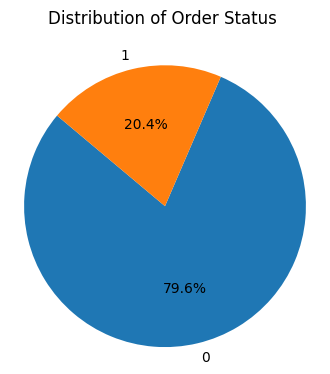

In [9]:
plt.figure(figsize=(4,4))
output_counts = df['Exited'].value_counts()
plt.pie(output_counts, labels=output_counts.index, autopct='%1.1f%%', startangle=140)

plt.axis('equal')
plt.title('Distribution of Order Status \n')
plt.ylabel('')

plt.show()

Observation:

Box plot for numerical features:


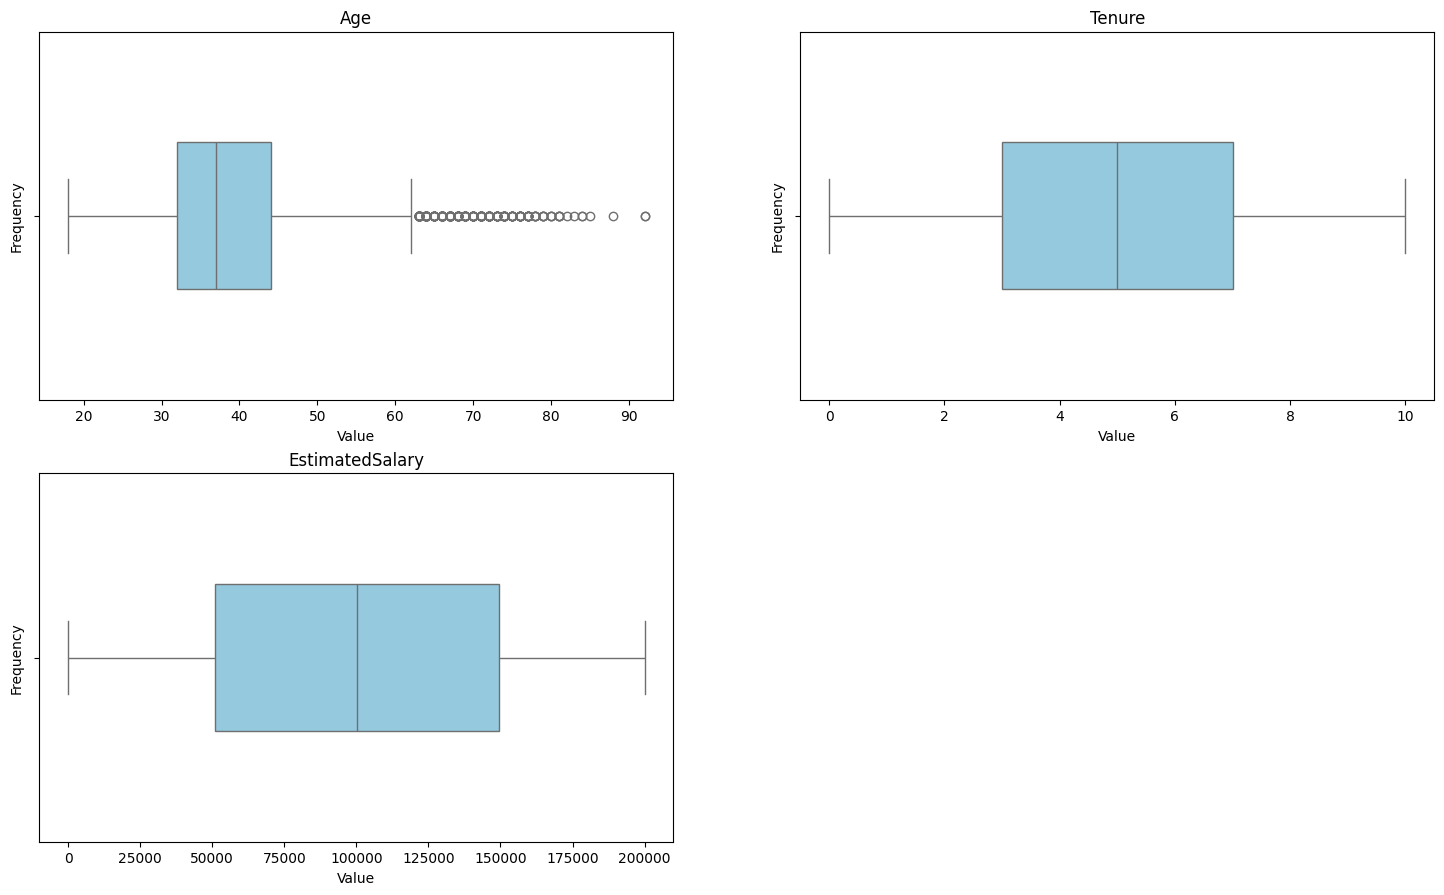

In [10]:
print("Box plot for numerical features:")
plt.figure(figsize=(18,22))
numeric_features = ['Age','Tenure','EstimatedSalary']
for i, column in enumerate(numeric_features):
    plt.subplot(4,2, i + 1)
    sns.boxplot(x=df[column], color='skyblue', width=0.4)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

Count plot for categorical features:


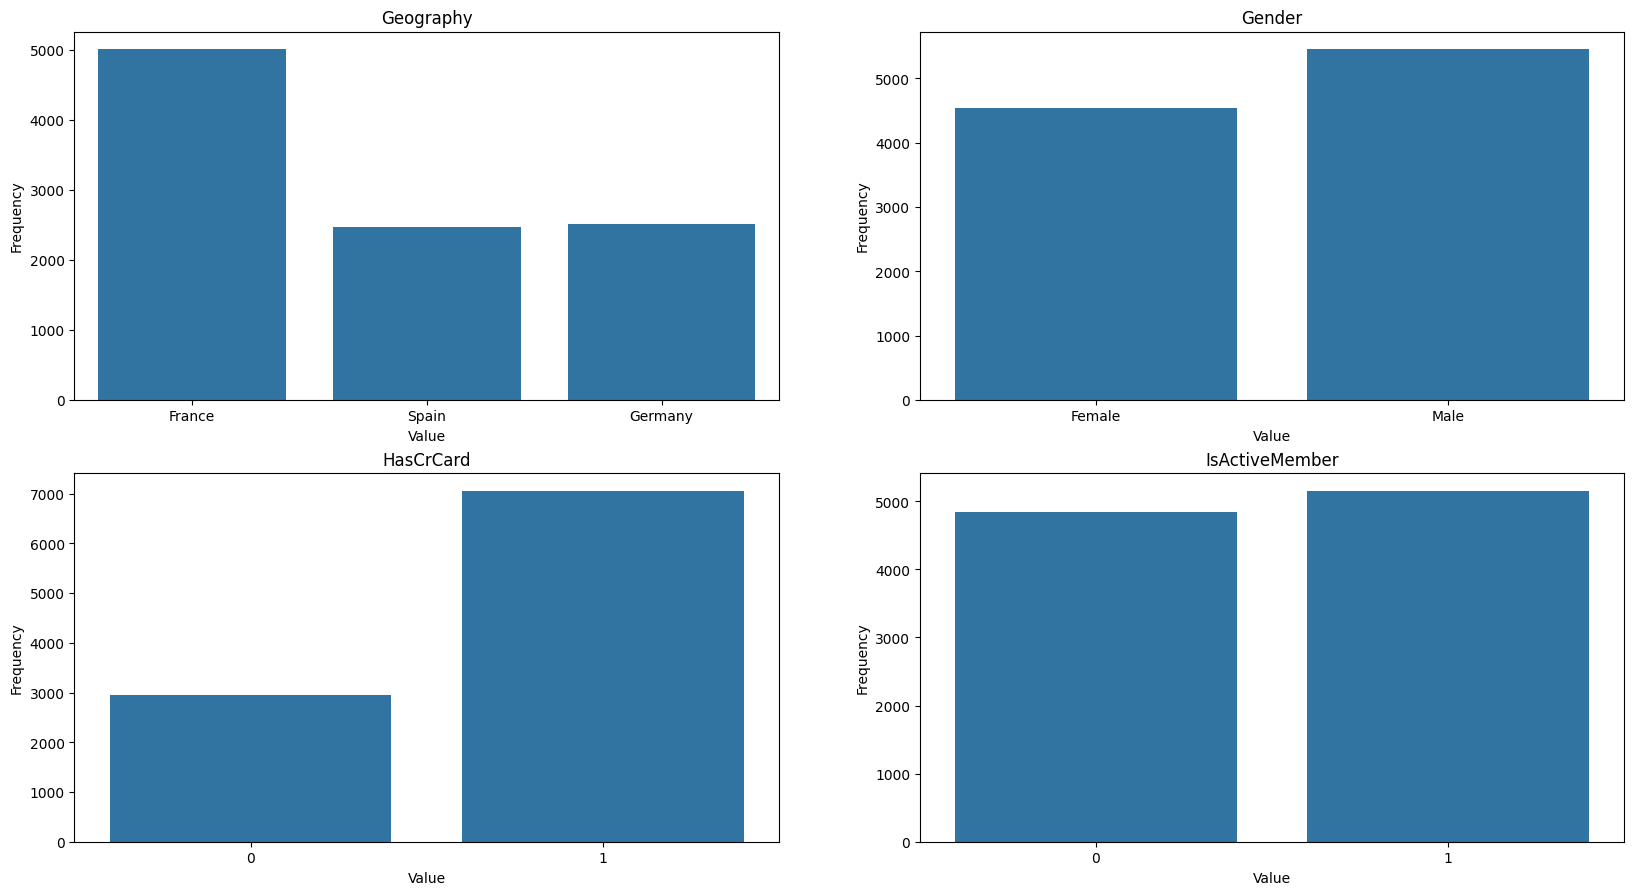

In [11]:
print("Count plot for categorical features:")
plt.figure(figsize=(20,22))

for i, column in enumerate(['Geography','Gender','HasCrCard','IsActiveMember']):
    plt.subplot(4,2,i + 1)
    sns.countplot(x= df[column], data=df)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

Observing independent variables based on the Exited Column:


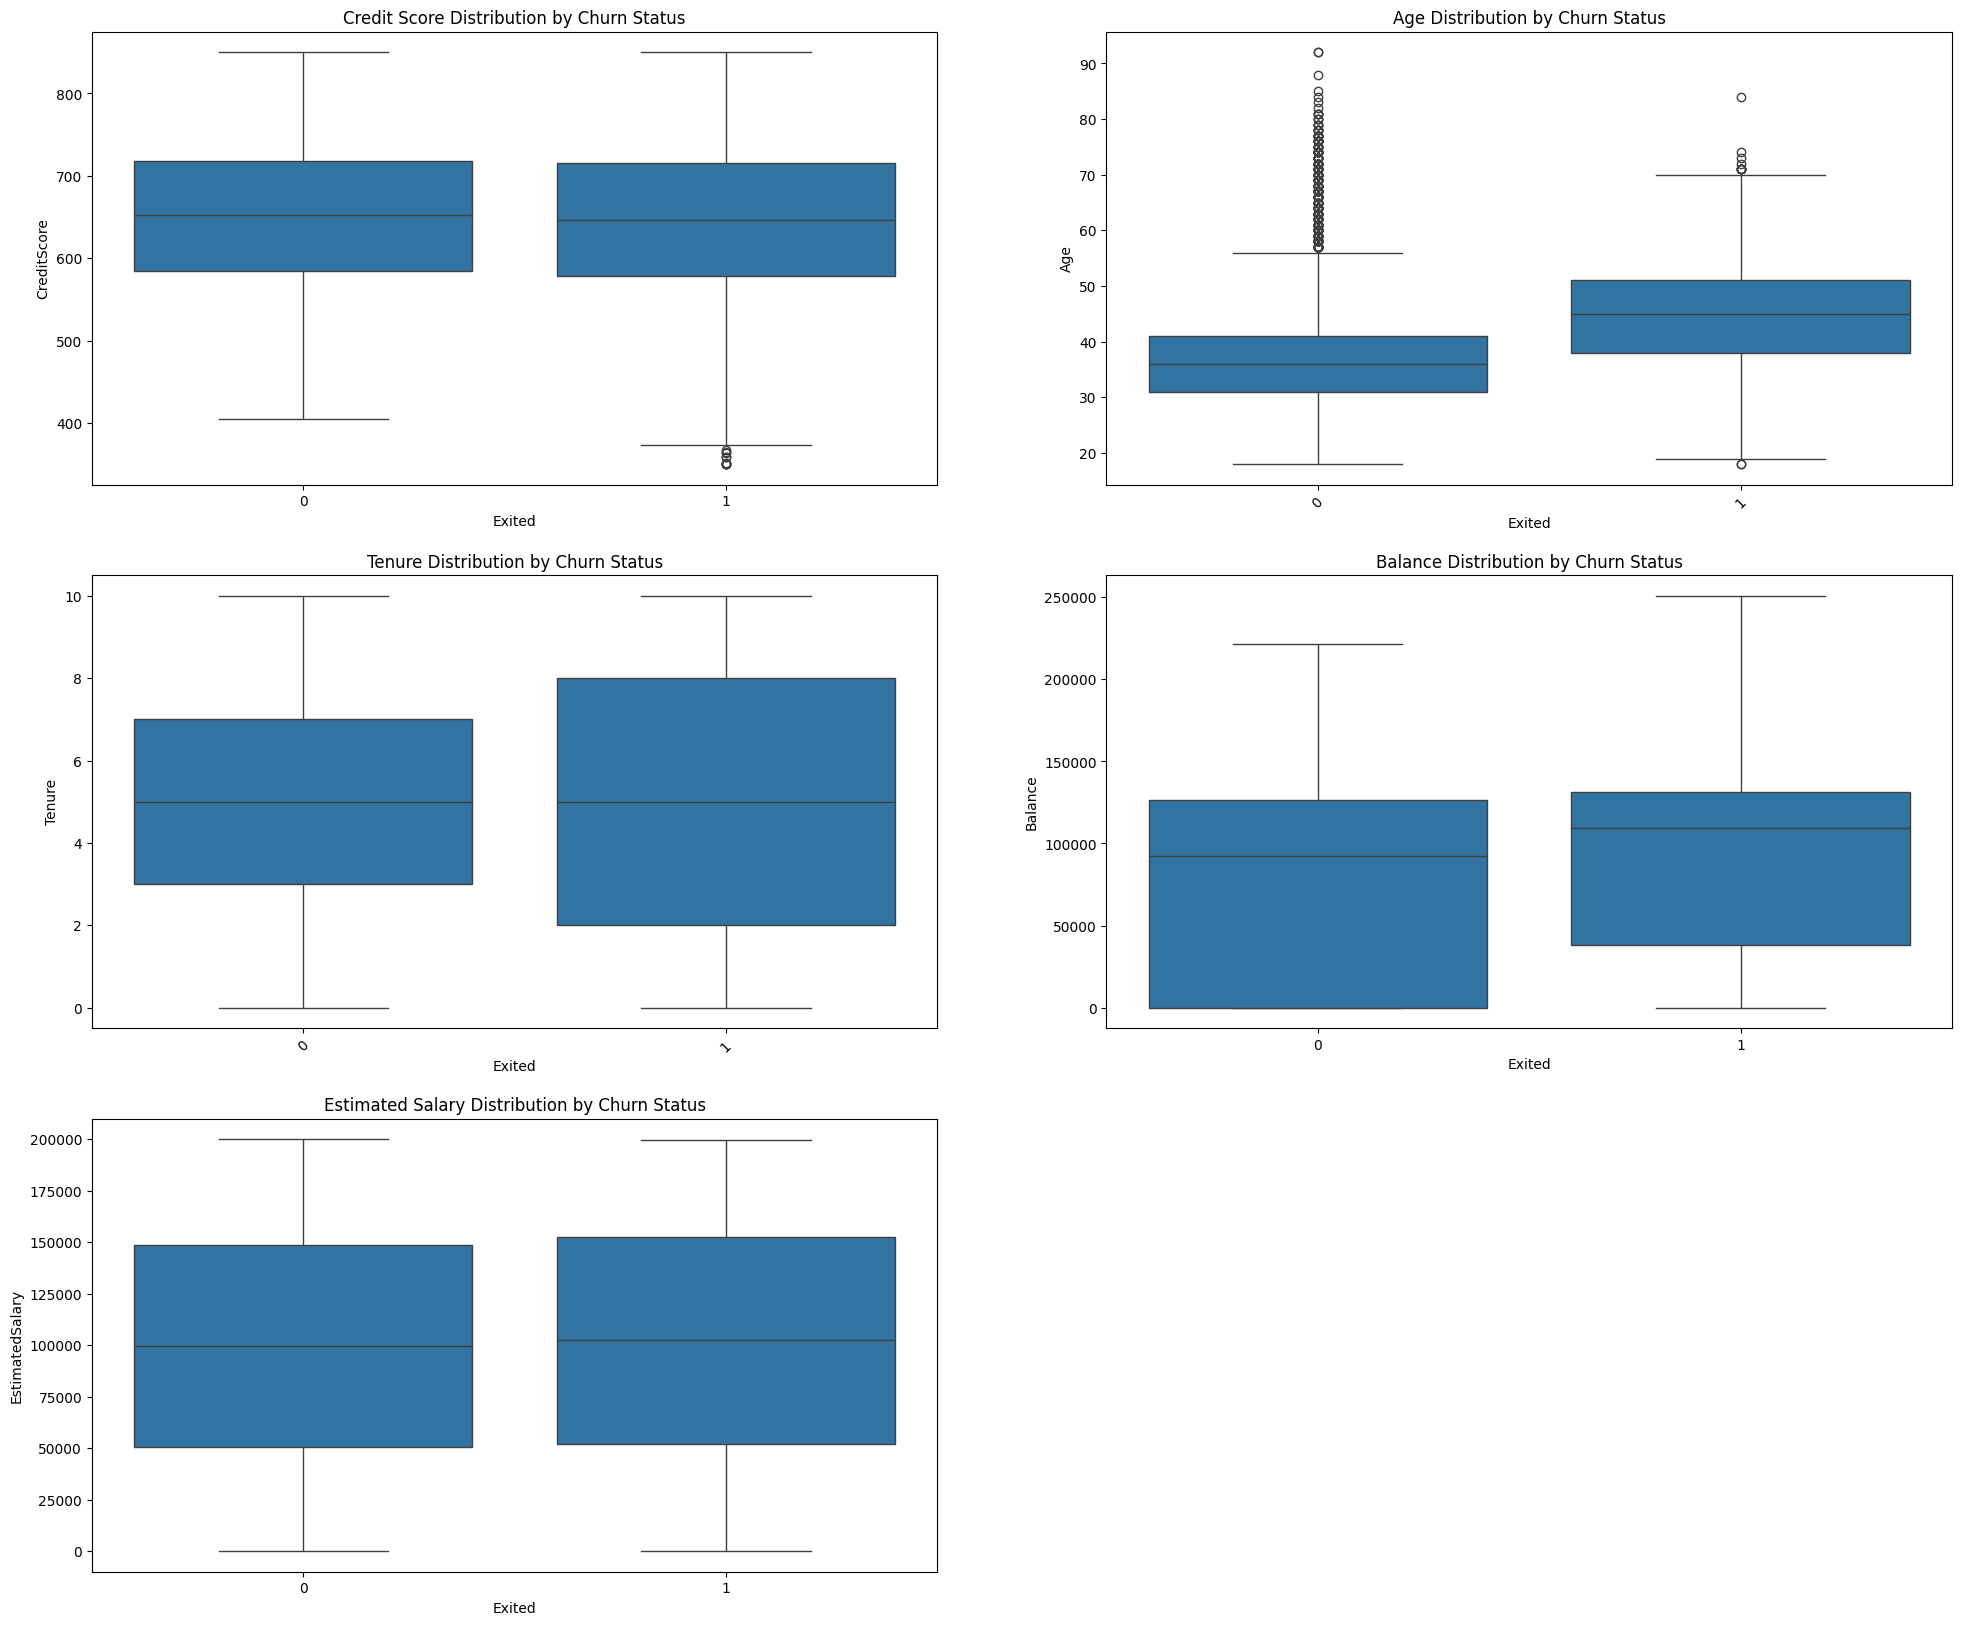

In [12]:
print("Observing independent variables based on the Exited Column:")

fig, axes = plt.subplots(3,2, figsize=(24,20))

sns.boxplot(data=df, y='CreditScore', x ='Exited',  ax=axes[0,0])
axes[0,0].set_title('Credit Score Distribution by Churn Status')

sns.boxplot(data=df, y='Age', x ='Exited', ax=axes[0,1])
axes[0,1].set_title('Age Distribution by Churn Status')
axes[0,1].tick_params(axis='x', rotation=45)

sns.boxplot(data=df, y='Tenure', x ='Exited', ax=axes[1,0])
axes[1,0].set_title('Tenure Distribution by Churn Status')
axes[1,0].tick_params(axis='x', rotation=45)

sns.boxplot(data=df, y='Balance', x ='Exited', ax=axes[1,1])
axes[1,1].set_title('Balance Distribution by Churn Status')

sns.boxplot(data=df, y='EstimatedSalary', x= 'Exited', ax=axes[2,0])
axes[2,0].set_title('Estimated Salary Distribution by Churn Status')

axes[2,1].axis('off')
plt.show()

Observation:
The credit score distribution between customers who churned and those who did not churn is similar, indicating that the credit score may not be a strong predictor of churn.

The tenure distribution suggests that customers with a shorter tenure are slightly more likely to churn than those with a longer tenure.

Age distribution shows a more pronounced difference - older customers appear more likely to churn than younger ones.

Lastly, the balance distribution is significantly different, with churned customers having higher balances on average. This could indicate that customers with higher balances are at a higher risk of churn.

The estimated salary distribution does not show a stark difference between the churned and retained customers, suggesting that salary may not be a primary factor in the decision to churn.

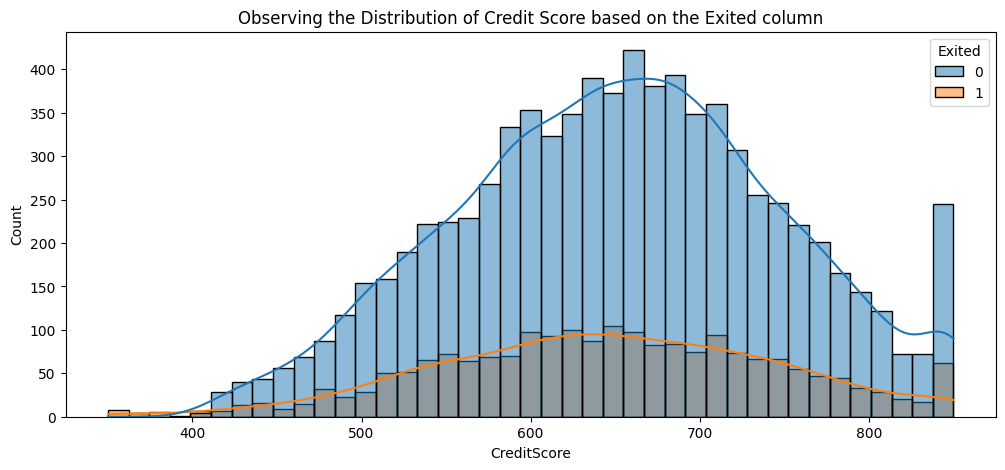

In [13]:
plt.figure(figsize=(12, 5))
sns.histplot(data=df, x='CreditScore', hue='Exited', kde=True)
plt.title('Observing the Distribution of Credit Score based on the Exited column')
plt.show()

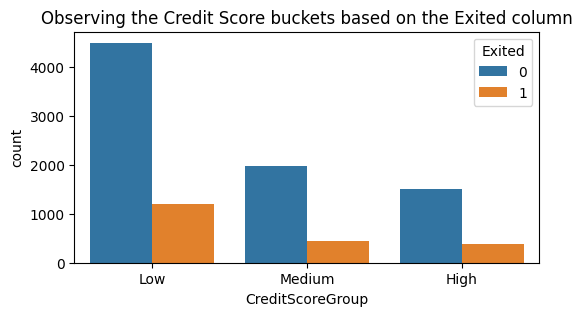

In [14]:
bins = [0,669,739,850]
labels = ['Low','Medium','High']

df['CreditScoreGroup'] = pd.cut(df['CreditScore'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(6,3))
sns.countplot(x = 'CreditScoreGroup', hue = 'Exited', data = df)
plt.title('Observing the Credit Score buckets based on the Exited column')
plt.show()

Observation:
Majority of customers who churned are in the 'High' credit score group, suggesting that credit score might have some influence on churn, albeit not a straightforward one

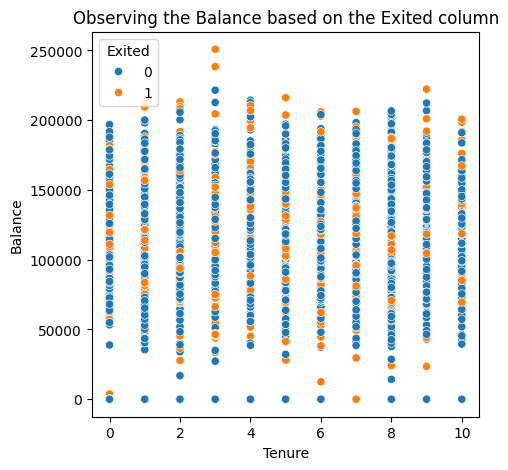

In [15]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='Tenure', y='Balance', hue='Exited', data=df)
plt.title('Observing the Balance based on the Exited column')
plt.show()

Observation:
The scatter plot indicates that there is no clear pattern or correlation between tenure and balance for both churned and retained customers, implying these factors independently do not strongly predict customer churn

In [16]:
df['CreditUtilization']=df['Balance']/df['CreditScore']

df['InteractionScore']=df['NumOfProducts']+df['HasCrCard']+df['IsActiveMember']

df['BalanceToSalaryRatio']=df['Balance']/df['EstimatedSalary']

df['CreditScoreAgeInteraction']=df['CreditScore']*df['Age']

In [21]:
cat_col = ['Geography','Gender','CreditScoreGroup']

print("Observing the categorical column disribution before encoding: \n")
for columns in cat_col:
    print(columns, '\n')
    print(df[columns].value_counts(),'\n')

Observing the categorical column disribution before encoding: 

Geography 

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64 

Gender 

Gender
Male      5457
Female    4543
Name: count, dtype: int64 

CreditScoreGroup 

CreditScoreGroup
Low       5693
Medium    2428
High      1879
Name: count, dtype: int64 

